In [36]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

usps_mat = sio.loadmat("Data/usps_all.mat")
images = np.transpose(usps_mat['data'].reshape(256, 11000))
print(images.shape)

def create_img( img_vector ):
    return  np.rot90(np.flip(img_vector.reshape([16, 16]), 0), 3)


(11000, 256)


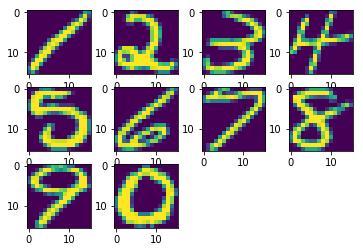

In [37]:

#display the first 10 hand written symbols
plt.figure(2)
for i in range(0,10):
    plt.subplot(3,4,i+1)
    letter = create_img( images[i,:] )
    plt.imshow(letter)
plt.show()


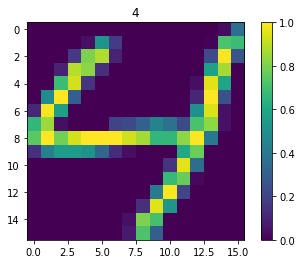

In [38]:
# Creates labels
labels = np.tile([1, 2, 3, 4, 5, 6, 7, 8, 9, 0], 1100)

#Normalize images
max = np.amax(images)
min = np.amin(images)
images = images / (max - min)

# Test vizualization
indice = 9523
plt.figure()
plt.imshow( create_img(images[indice,:]))
plt.title(labels[indice])
plt.colorbar()
plt.grid(False)




In [39]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [40]:
print(tf.__version__)
print(images.shape)
print(labels.shape)

1.8.0
(11000, 256)
(11000,)


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.2)

In [42]:
print(X_train.shape)

(8800, 256)


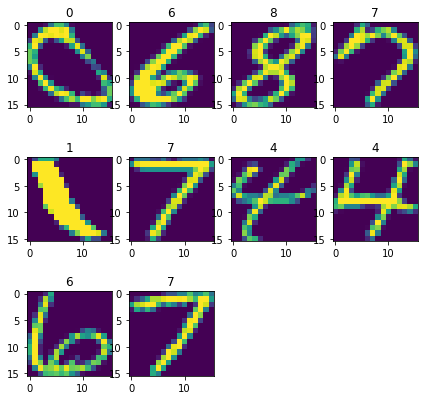

In [43]:
#display the first 10 hand written symbols

plt.figure(figsize=(7,7))
#plt.subplots_adjust(hspace=0.4)
plt.tight_layout()
for i in range(0,10):
    plt.subplot(3,4,i+1)
    letter = create_img( X_train[i,:] )
    plt.imshow(letter)
    plt.title(Y_train[i])
plt.show()

In [44]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [45]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
8800/8800 [==============================] - 0s 50us/step - loss: 0.5904 - acc: 0.8493
Epoch 2/5
8800/8800 [==============================] - 0s 37us/step - loss: 0.1917 - acc: 0.9482
Epoch 3/5
8800/8800 [==============================] - 0s 37us/step - loss: 0.1392 - acc: 0.9645
Epoch 4/5
8800/8800 [==============================] - 0s 37us/step - loss: 0.1091 - acc: 0.9703
Epoch 5/5
8800/8800 [==============================] - 0s 36us/step - loss: 0.0877 - acc: 0.9772


In [47]:
test_loss, test_acc=model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

2200/2200 [==============================] - 0s 30us/step
Test accuracy: 0.9550000002167441


In [48]:
prediction = model.predict(X_test)
Y_pred = np.argmax(prediction, axis=1)

Confusion matrix, without normalization


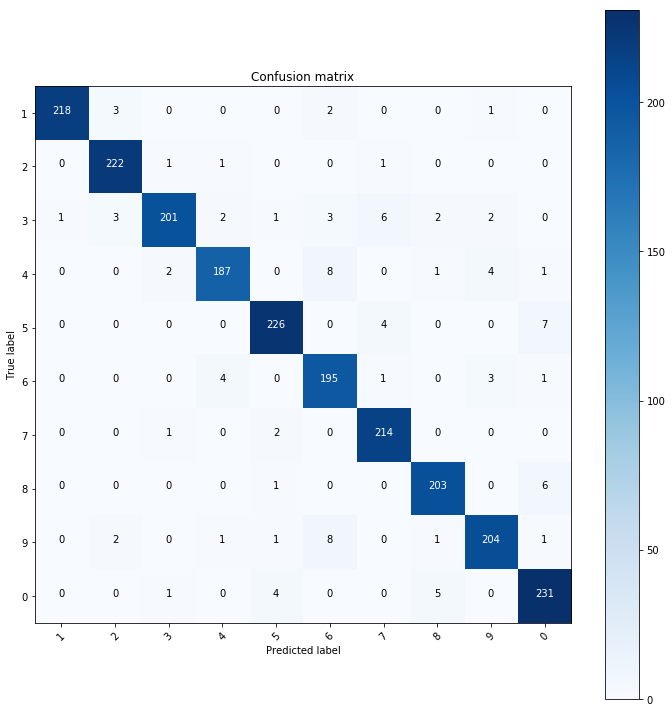

In [49]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


confusion = confusion_matrix(Y_test, Y_pred)
class_names =  [ 1, 2, 3, 4, 5,  6, 7, 8, 9, 0]
class_names = [str(x) for x in class_names ]


plot_confusion_matrix(confusion, classes=class_names)

In [53]:
create_img(images[2, :])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.42745098, 0.69411765, 0.25882353, 0.04313725, 0.03137255,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.29803922, 0.66666667, 0.84705882, 0.89019608, 0.82745098,
        0.4627451 , 0.24313725, 0.03529412, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.3372549 , 0.79607843,
        1.        , 1.        , 0.79215686, 0.2       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.12941176, 0.6745098 , 1.        , 0.8627451 , 0.21568627,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 